In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r'F:\AppliedDataScience\datasets\Electric_Production.csv')

In [4]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


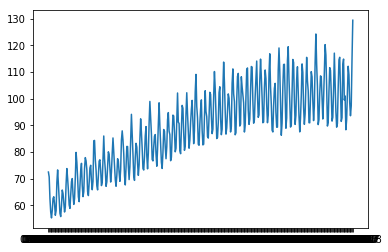

In [10]:
y = plt.plot(df['DATE'],df['Value'])
plt.show()

In [26]:
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm


In [19]:
df.index = pd.DatetimeIndex(freq="w",start = 0,periods = 397)
df.head()

,DATE,Value
1970-01-04,01-01-1985,72.5052
1970-01-11,02-01-1985,70.6720
1970-01-18,03-01-1985,62.4502
1970-01-25,04-01-1985,57.4714
1970-02-01,05-01-1985,55.3151


In [32]:
decomp1 = sm.tsa.seasonal_decompose(df['Value'],model = 'multiplicative')
decomp2 = sm.tsa.seasonal_decompose(df['Value'],model = 'additive')

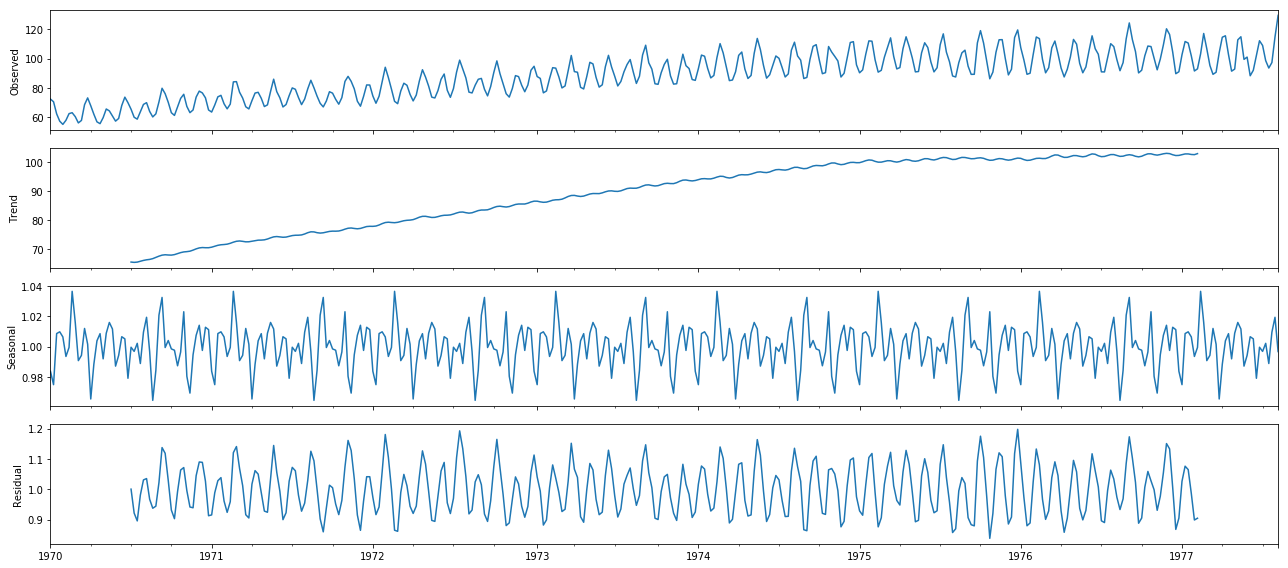

In [36]:
decomp1.plot()

plt.show()


In [38]:
print(df.shape)

(397, 2)


In [40]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [47]:
p = d = range(0, 2)
pd = list(itertools.product(p, d))
seasonal_pd = [(x[0], x[1], 16) for x in list(itertools.product(p, d))]

In [48]:
seasonal_pd

[(0, 0, 16), (0, 1, 16), (1, 0, 16), (1, 1, 16)]

In [74]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pd[0], seasonal_pd[0]))
print('SARIMAX: {} x {}'.format(pd[1], seasonal_pd[1]))
print('SARIMAX: {} x {}'.format(pd[2], seasonal_pd[2]))
print('SARIMAX: {} x {}'.format(pd[3], seasonal_pd[3]))
#print('SARIMAX: {} x {}'.format(pd[2], seasonal_pd[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0) x (0, 0, 16)
SARIMAX: (0, 1) x (0, 1, 16)
SARIMAX: (1, 0) x (1, 0, 16)
SARIMAX: (1, 1) x (1, 1, 16)


In [82]:
for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(df['Value'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))


ARIMA(1, 1)x(1, 1, 16)12 - AIC:2761.6218922678763


In [89]:
mod = sm.tsa.statespace.SARIMAX(df['Value'])
results = mod.fit()

In [91]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9968      0.004    246.091      0.000       0.989       1.005
sigma2        60.0712      5.507     10.909      0.000      49.278      70.864


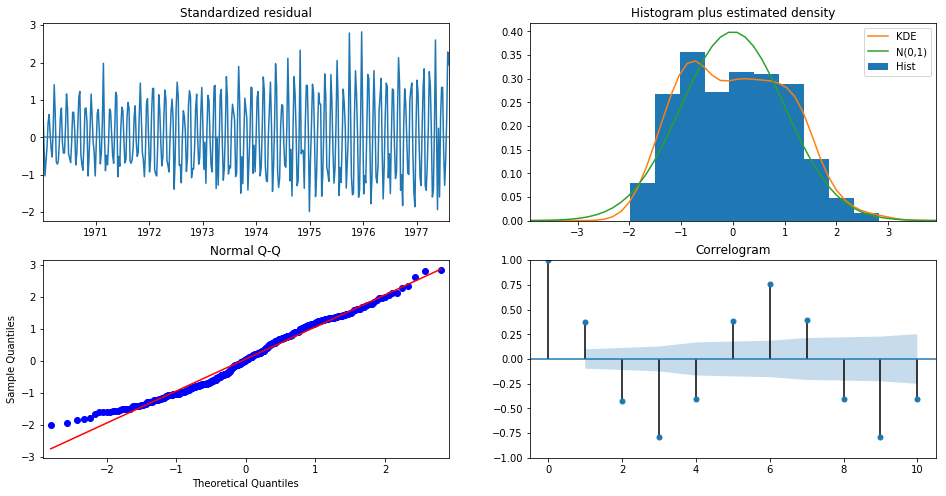

In [92]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [93]:
df.head()

,DATE,Value
1970-01-04,01-01-1985,72.5052
1970-01-11,02-01-1985,70.6720
1970-01-18,03-01-1985,62.4502
1970-01-25,04-01-1985,57.4714
1970-02-01,05-01-1985,55.3151
